## Importing and Filtering the Flight Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
flights_raw = pd.read_csv('./downloads/extracted/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_1.csv', low_memory = False)

In [7]:
# select columns to keep
def cols_to_keep(flights_raw):
    columns_to_keep = [
        "FlightDate",
        "DepTime",
        "CRSDepTime",
        "DepDelay",
        "ArrTime",
        "CRSArrTime",
        "ArrDelay",
        "Reporting_Airline",
        "Tail_Number",
        "Flight_Number_Reporting_Airline",
        "Origin",
        "Dest",
        "AirTime",
        "ActualElapsedTime",
        "Distance",
        "Cancelled",
        "Diverted",
    ]
    flights = flights_raw.loc[:, columns_to_keep]
    return flights

flights = cols_to_keep(flights_raw)

In [11]:
# rename columns
def rename_cols(flights):
    new_column_names = {
        'FlightDate': 'flight_date',
        'DepTime': 'dep_time',
        'CRSDepTime': 'sched_dep_time',
        'DepDelay': 'dep_delay',
        'ArrTime': 'arr_time',
        'CRSArrTime': 'sched_arr_time',
        'ArrDelay': 'arr_delay',
        'Reporting_Airline': 'airline',
        'Tail_Number': 'tail_number',
        'Flight_Number_Reporting_Airline': 'flight_number',
        'Origin': 'origin',
        'Dest': 'dest',
        'AirTime': 'air_time',
        'ActualElapsedTime': 'actual_elapsed_time',
        'Distance': 'distance',
        'Cancelled': 'cancelled',
        'Diverted': 'diverted'
    }
    flights.rename(columns=new_column_names, inplace=True)
    return flights

flights = rename_cols(flights)

In [10]:
# change datatype
def change_dtypes(flights):
    types_change = {
        'flight_date': 'datetime64[ns]',
        'dep_time': 'float64',
        'sched_dep_time': 'int16',
        'dep_delay': 'float64',
        'arr_time': 'float64',
        'sched_arr_time': 'int16',
        'arr_delay': 'float64',
        'airline': 'O',
        'tail_number': 'O',
        'flight_number': 'int64',
        'origin': 'O',
        'dest': 'O',
        'air_time': 'float64',
        'actual_elapsed_time': 'float64',
        'distance': 'int16',
        'cancelled': 'int16',
        'diverted': 'int16'
    }
    flights = flights.astype(types_change)
    return flights

flights = change_dtypes(flights)

In [15]:
flights = flights[flights["origin"].isin(["ORD", "EWR", "BOS"])]


In [21]:
flights['flight_date'] = pd.to_datetime(flights['flight_date'], format='%d-%m-%Y')
start_date = '2019-01-18'
end_date = '2019-01-21'
storm= flights[flights['flight_date'].between(start_date, end_date)]

In [22]:
flights['flight_date'] = pd.to_datetime(flights['flight_date'], format='%d-%m-%Y')
start_date = '2019-01-11'
end_date = '2019-01-14'
pre_storm= flights[flights['flight_date'].between(start_date, end_date)]
pre_storm

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
23675,2019-01-12,728.0,730,-2.0,1003.0,1016,-13.0,OO,N282SY,3555,ORD,SLC,185.0,215.0,1250,0,0
23719,2019-01-12,1350.0,1325,25.0,1748.0,1642,66.0,OO,N289SY,3590,ORD,JFK,97.0,178.0,740,0,0
23724,2019-01-12,720.0,700,20.0,1021.0,1027,-6.0,OO,N279SY,3595,ORD,JFK,99.0,121.0,740,0,0
23736,2019-01-12,1635.0,1645,-10.0,1905.0,1929,-24.0,OO,N824SK,3608,ORD,SLC,157.0,210.0,1250,0,0
23793,2019-01-12,1356.0,1400,-4.0,1510.0,1529,-19.0,OO,N265SY,3662,BOS,LGA,46.0,74.0,184,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577159,2019-01-13,857.0,900,-3.0,1156.0,1215,-19.0,UA,N212UA,1148,EWR,LAX,293.0,359.0,2454,0,0
577162,2019-01-13,1814.0,1824,-10.0,2020.0,2112,-52.0,UA,N37422,1140,BOS,DEN,229.0,246.0,1754,0,0
577167,2019-01-13,1411.0,1412,-1.0,1659.0,1708,-9.0,UA,N67846,1128,ORD,IAH,134.0,168.0,925,0,0
577181,2019-01-13,1951.0,1955,-4.0,2233.0,2243,-10.0,UA,N69839,1113,ORD,IAH,132.0,162.0,925,0,0


## EDA of Flight and Weather Data

## Hypothesis 1: Can we see disrupted flight activity in Boston, Chicago and New York?  

Assumption: Yes, since news reports indicate Winter Storm Harper passed through Northeast USA  

Disrupted flight activity can be seen through:
- cancellations
- average departure delays


In [29]:
#calculating avg departure delays pre-storm and during storm

avg_dept_delay_storm = storm.groupby("origin")["dep_delay"].mean()
avg_dep_delay_pre_storm = pre_storm.groupby('origin')['dep_delay'].mean()

avg_dept_delay_storm

origin
BOS    55.300439
EWR    33.016365
ORD    29.708775
Name: dep_delay, dtype: float64

<Figure size 1000x600 with 0 Axes>

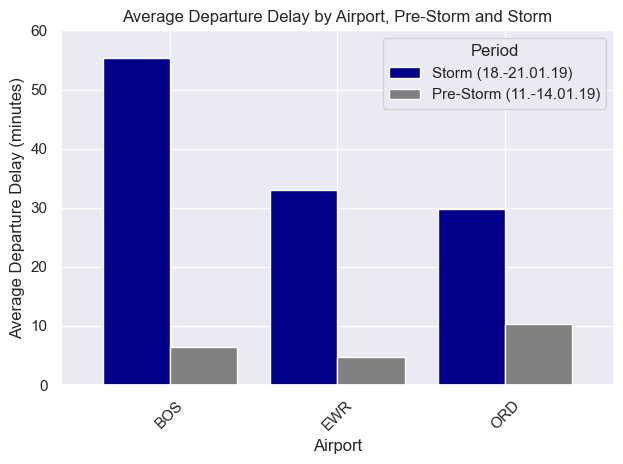

In [59]:
#graphing comparison in avg departure delays

avg_dep_delays = pd.DataFrame({
    'Storm (18.-21.01.19)': avg_dept_delay_storm,
    'Pre-Storm (11.-14.01.19)': avg_dep_delay_pre_storm
})
sns.set_style("darkgrid")
sns.set_context("notebook")
# Plot both as grouped bars
plt.figure(figsize=(10, 6))
avg_dep_delays.plot(kind='bar', color=['darkblue', 'grey'], width=0.8)
plt.title("Average Departure Delay by Airport, Pre-Storm and Storm")
plt.xlabel("Airport")
plt.ylabel("Average Departure Delay (minutes)")
plt.yticks([0,10,20,30,40,50,60])
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()

In [33]:
#calculating cancellations pre-storm and during storm

pre_storm_cancellations = pre_storm.groupby('origin')['cancelled'].sum()
storm_cancellations = storm.groupby('origin')['cancelled'].sum()

print(pre_storm_cancellations, storm_cancellations)

origin
BOS    23
EWR    12
ORD    69
Name: cancelled, dtype: int16 origin
BOS    431
EWR     95
ORD    547
Name: cancelled, dtype: int16


<Figure size 1000x600 with 0 Axes>

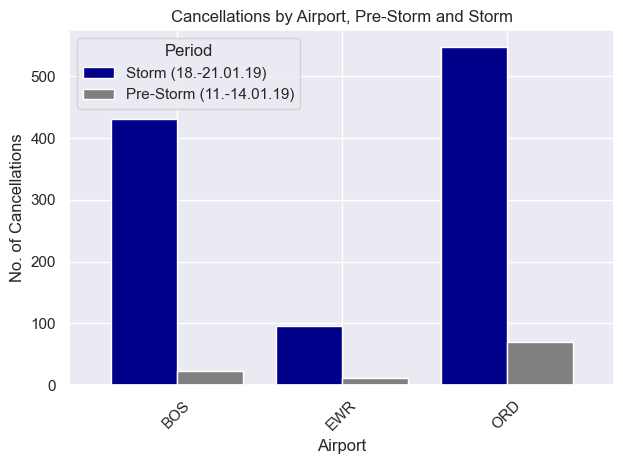

In [58]:
#graphing comparison of cancellations

cancellations = pd.DataFrame({
    'Storm (18.-21.01.19)': storm_cancellations,
    'Pre-Storm (11.-14.01.19)': pre_storm_cancellations
})

sns.set_style("darkgrid")
# Plot both as grouped bars
plt.figure(figsize=(10, 6))
cancellations.plot(kind='bar', color=['darkblue', 'grey'], width=0.8)
plt.title("Cancellations by Airport, Pre-Storm and Storm")
plt.xlabel("Airport")
plt.ylabel("No. of Cancellations")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()

Hypothesis 1: Proved! Flight activity was disrupted, although significantly less so at EWR


## Hypothesis 2: Can we see evidence of a thunderstorm across weather data in Chicago, Boston and New York?

Assumption: Yes, because news reports detail of thunderstorms occuring!

Initial question: What makes a thunderstorm?
- Precipitation: Sudden, intense precipitation (rain, sleet, or snow).
- Wind Speed: High or gusty winds during the event.
(other things like dew point, sudden temperature drop etc)  

* We have the above two markers in our data, so we can examine whether thunderstorms did indeed take place in these three locations

In [42]:
bos_storm_weather = pd.read_csv('./downloads/extracted/weather_storm_BOS.csv', low_memory = False)
newark_storm_weather = pd.read_csv('./downloads/extracted/weather_storm_EWR.csv', low_memory = False)
chic_storm_weather = pd.read_csv('./downloads/extracted/weather_storm_ORD.csv', low_memory = False)

In [44]:
weather_all = pd.concat(
    [bos_storm_weather, newark_storm_weather, chic_storm_weather], 
    keys=["Boston", "Newark", "Chicago"])

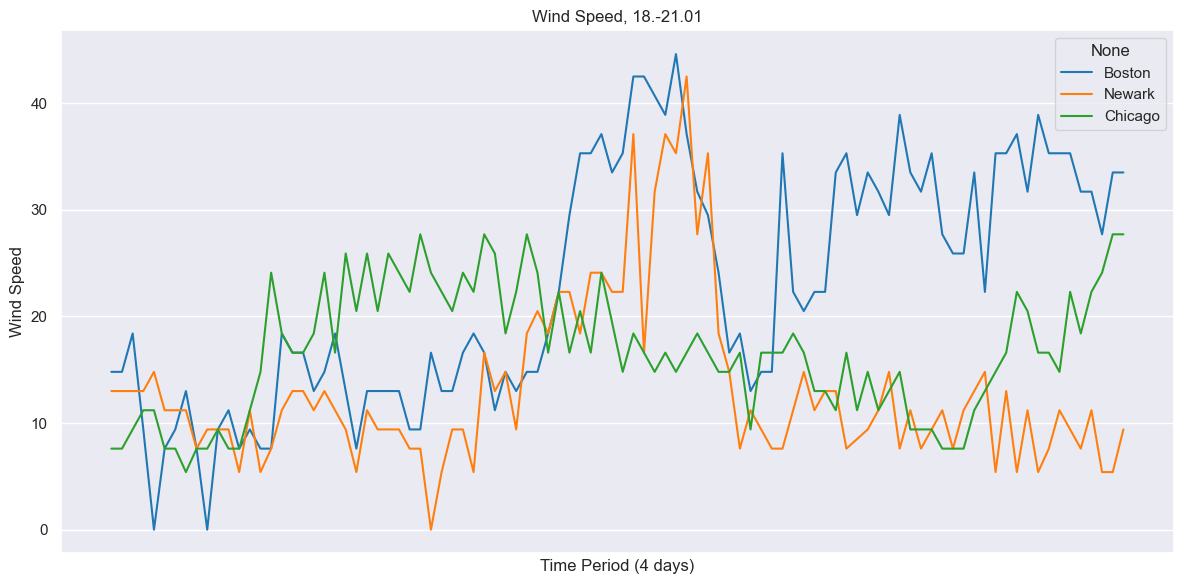

In [61]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.lineplot(data=weather_all, x="time", y="wind_speed", hue=weather_all.index.get_level_values(0))

# Add title and axis labels
plt.title("Wind Speed, 18.-21.01")
plt.xlabel("Time Period (4 days)")
plt.ylabel("Wind Speed")

# Improve date formatting on the x-axis for better readability
plt.xticks([]) 
plt.tight_layout()
plt.show()

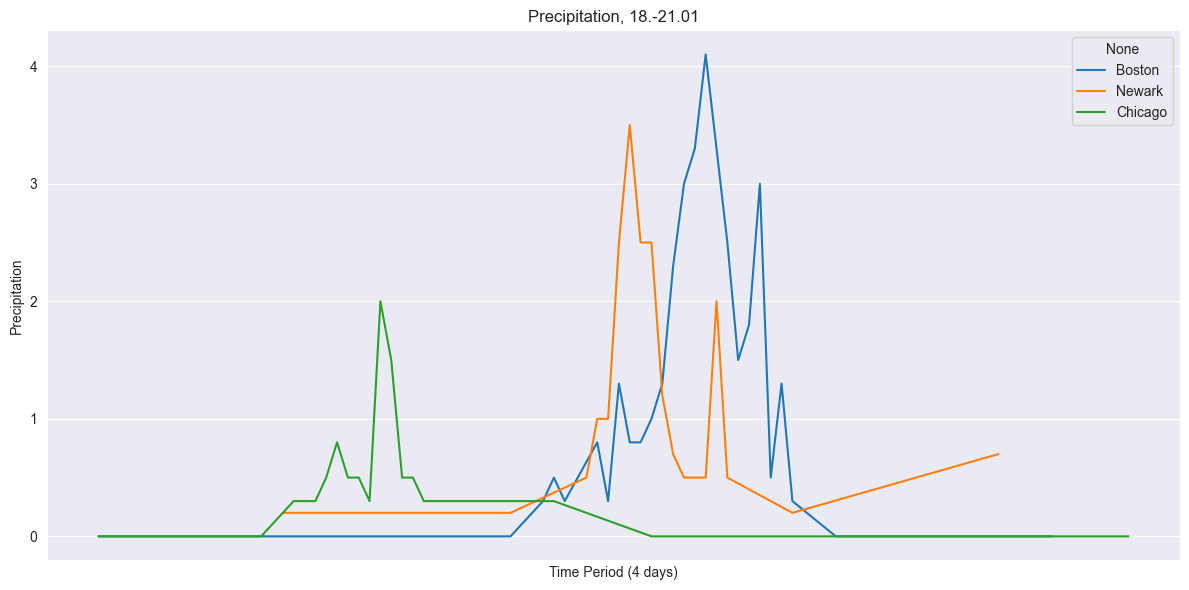

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_all, x="time", y="precipitation", hue=weather_all.index.get_level_values(0))

# Add title and axis labels
plt.title("Precipitation, 18.-21.01")
plt.xlabel("Time Period (4 days)")
plt.ylabel("Precipitation")

# Improve date formatting on the x-axis for better readability
plt.xticks([]) 
plt.tight_layout()
plt.show()

Hypothesis 2: Proved. The weather event can be seen in the data. High precipitation and wind speed levels are seen across Boston and Chicago which match to dates with high number of cancellations. There is also evidence of a thunderstorm occuring in New York, however...


## Hypothesis 3:  Is there a correlation between the severity of disrupted flight activity and the severity of the thunderstorm?
(Worse weather conditions = higher cancellation rates)?